In [1]:
import numpy as np
import matplotlib.pyplot as plt

calculate the error
and the dydx of b0 and b1
lose


Imagine you're trying to draw the "best" straight line through a bunch of random points in a graph. This line will help us predict y-values from x-values.

The line equation is: $y = b_1x + b_0$ where: 

- $b_1$ is the slope 

- $b_0$ y-intercept




To find the best line:

- $b_1$ = (how x and y change together)/(how much x varies)


For y-intercept:

- $b_1$ = average of y - (slope × average of x)

In [2]:
b0 = 5
b1 = 10
x = np.random.random(100)
y = b0 + (b1 * x)
print(y)

[14.46530886 13.08477577  6.52309667  6.80738696  6.46296963 10.41130031
 14.26694196  7.70468309  9.21969579  5.49946471 14.44406985 10.79341409
  5.68569207  9.12322908  5.96197851  9.10195605  7.9699177   9.28200195
 14.52503092  9.07195136 14.15739291 11.14361236 14.93536795 12.20477925
  7.19192814  7.02468281  9.79505425 13.801286    6.54568164  9.41343851
 12.12438285 13.68637473 10.62615503  5.7821093   6.79211972 12.22090016
 11.90434716  6.64278587 10.53628663  8.67658284 12.99586321  6.83417765
  8.37586773  9.22607335  9.93348854 10.98158049  5.76668641 14.62562368
  6.37898313 12.86642833  6.78361916 12.48793194 10.44909405  7.96133089
  7.19031788  7.5830001   9.01607935 11.34879285 12.62299259 14.65318127
  7.52716607  9.33487465 12.59973103  8.3123217  13.47493759  8.69934334
 11.64993625  9.18060535  5.39494487 10.00461536  6.46678808 13.22292442
  7.08468982  8.84426602 12.38192175 13.3375382   7.43265989  7.91156439
  7.73093577 13.3764122  12.07191275  8.40822699 14

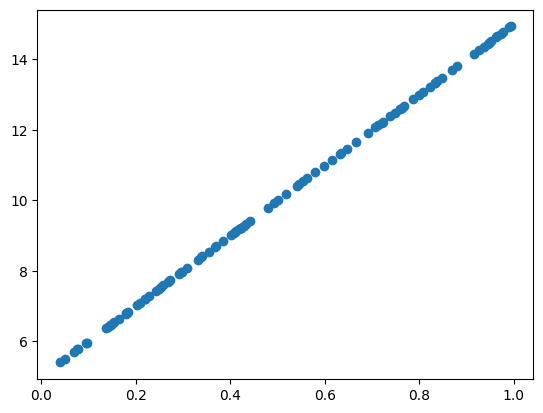

In [3]:
plt.scatter(x, y)

Finding the estimate and comparing it the the values that I took.

In [4]:
b1_new = np.sum((y - np.mean(y)) * x)/np.sum((x - np.mean(x)) * x)
print(b1_new)

10.000000000000005


In [5]:
b0_new = np.mean(y) - (b1 * np.mean(x))
print(b0_new)

4.999999999999999


N is for the noise
what is a normal distribution bell shaped curve

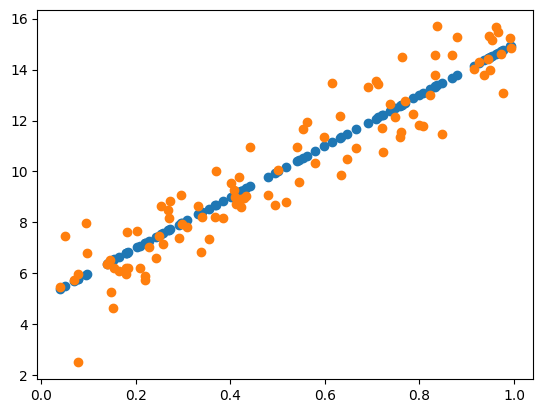

In [6]:
yn = y + np.random.normal(0, 1, 100)
plt.scatter(x, y)
plt.scatter(x, yn)

In [7]:
b1_n = np.sum((yn - np.mean(yn)) * x)/np.sum((x - np.mean(x)) * x)
print(b1_n)
b0_n = np.mean(yn) - (b1 * np.mean(x))
print(b0_n)
# Not perfect estimate with the noise

10.330483455652477
4.965753308122424


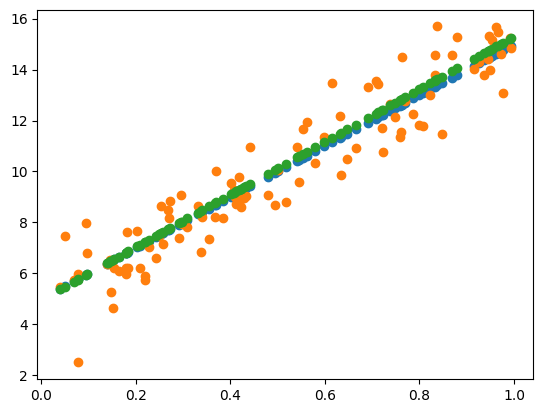

In [8]:
y_est = b0_n + (b1_n * x)
plt.scatter(x, y)
plt.scatter(x, yn)
plt.scatter(x, y_est) # Because of the noise the green line is not equal to the blue line
#plt.plot(x, y_est)


calculate the error between y and y_est

In [17]:
print(b0, b1)

5 10


A meshgrid is like drawing horizontal and vertical lines to create a grid. Each intersection point has both an x and y coordinate. We create it in code to help us plot surfaces and contours.

Contour plots, which use this meshgrid, are like topographic maps that show you "elevation" or height using lines or colors. Just like how a topographic map shows mountain heights using contour lines, in data visualization these contour plots show where a function has the same value using lines or color gradients.

Together, meshgrid provides the foundation, and contour plots help us visualize how values change across that grid. 

In [9]:

b0r = np.linspace(4.5, 5.5, 100)
b1r = np.linspace(9.5, 10.5, 100)


In [10]:
b0v, b1v = np.meshgrid(b0r, b1r)
print(b0v.shape)
print(b1v.shape)
#converted to indices storing the values of i and j
print(b0v[25,3])
print(b1v[25,3])
#vector product one line to do all the calc
y_v = b0v + (b1v * x)
#cacl y for all the point cal the error and plot it look at it from the top circles


(100, 100)
(100, 100)
4.53030303030303
9.752525252525253


In [42]:
a = np.arange(4).reshape(2, 2)
x = np.arange(3)
#print(a)
#print(x)
b = a.reshape(2, 2, 1)
c = x.reshape(1, 1, 3)
#print(b)
#print(c)
u = b * c
print(u)
pprint(np.sum(u))

[[[0 0 0]
  [0 1 2]]

 [[0 2 4]
  [0 3 6]]]


In [18]:
b0vr = b0v.reshape(100, 100, 1)
b1vr = b1v.reshape(100, 100, 1)
y_v = b0vr + (b1vr * x)
residue = np.mean(np.square(y - y_v), axis = 2)
print(residue.shape)
print(residue)

(100, 100)
[[0.58656999 0.57147611 0.55658629 ... 0.07257075 0.07727077 0.08217485]
 [0.57810054 0.56310959 0.54832269 ... 0.07408524 0.07888819 0.08389519]
 [0.56969995 0.55481193 0.54012796 ... 0.0756686  0.08057448 0.08568441]
 ...
 [0.08568441 0.08057448 0.0756686  ... 0.54012796 0.55481193 0.56969995]
 [0.08389519 0.07888819 0.07408524 ... 0.54832269 0.56310959 0.57810054]
 [0.08217485 0.07727077 0.07257075 ... 0.55658629 0.57147611 0.58656999]]


In [12]:
from mpl_toolkits.mplot3d import Axes3D

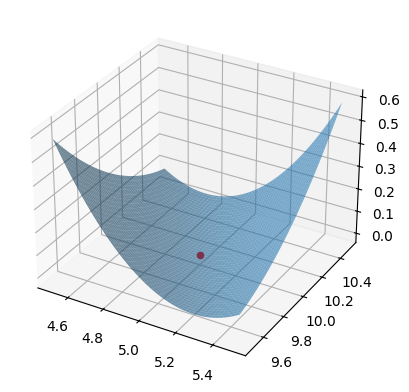

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(b0v, b1v, residue, alpha = 0.6)
ax.scatter(b0, b1, 0, c = 'r')
#The red dot shows the minimum

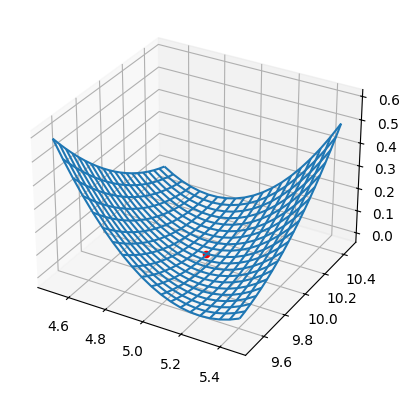

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(b0v[::5, ::5], b1v[::5, ::5], residue[::5, ::5])
ax.scatter(b0, b1, 0, c = 'r')
# Make it look more like a mesh so that its easier to see the min

In [16]:
print(y[:10])
print(y_v[0,0,:10])

[14.46530886 13.08477577  6.52309667  6.80738696  6.46296963 10.41130031
 14.26694196  7.70468309  9.21969579  5.49946471]
[8.75938899 8.1381491  5.1853935  5.31332413 5.15833633 6.93508514
 8.67012388 5.71710739 6.39886311 4.72475912]


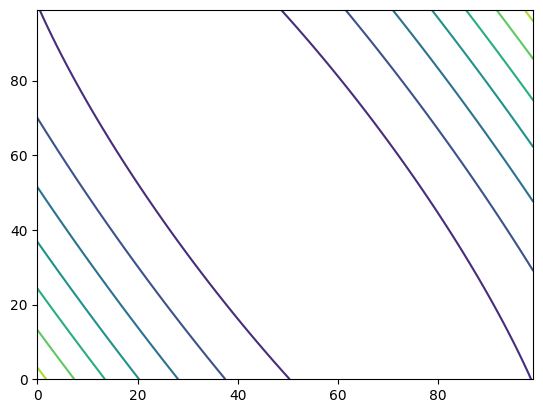

In [ ]:
#These are contour plots and differents ways you can use contour plots to visualize
plt.contour(residue)

[0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64]


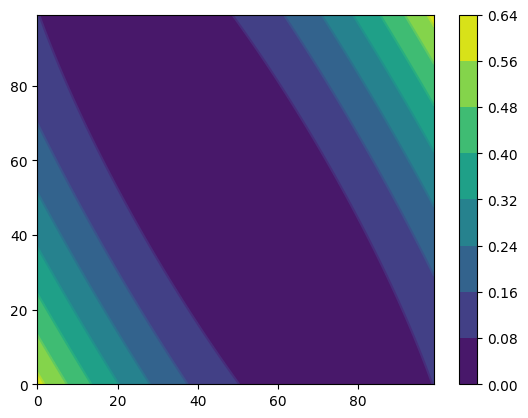

In [21]:
plt.contourf(residue)
plt.colorbar()
c = plt.contour(residue)
print(c.levels)

<a list of 12 text.Text objects>

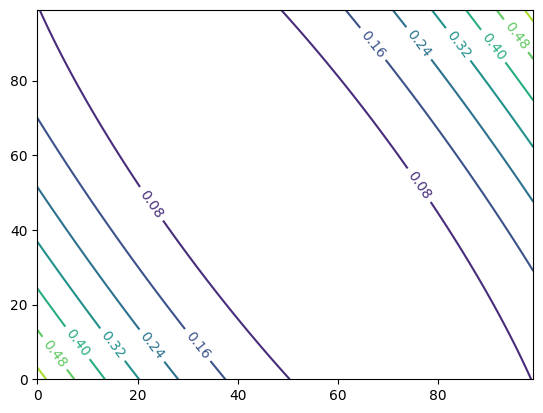

In [22]:
c = plt.contour(residue)
plt.clabel(c, levels = c.levels)